In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import os
import requests
import glob
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format



df = pd.read_csv('/project_data/data_asset/twitter-archive-enhanced.csv')
df


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,nan,nan,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,nan,nan,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,nan,nan,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,nan,nan,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,nan,nan,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,nan,nan,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [2]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [3]:
#load tweet image predictions
#url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#response = requests.get(url)


df_img = pd.read_csv('/project_data/data_asset/image-predictions.tsv', sep='\t')
df_img.head()



,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True


In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        
        count += 1
        print(str(count) + ": " + str(tweet_id))
        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()

print(end - start)
print(fails_dict)


SyntaxError: invalid syntax (<ipython-input-4-8e47c5ece8d7>, line 8)

In [ ]:
df_counts = pd.DataFrame(columns = ['tweet_id', 'retweet_count', 'fav_count'])
with open('tweet_json.txt') as f:
    for line in f:
        
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        fav_count = status['favorite_count']
        df_counts = df_counts.append(pd.DataFrame([[tweet_id, retweet_count, fav_count]], columns=['tweet_id', 'retweet_count', 'favorite_count']))
        
df_counts

In [ ]:
df_counts = df_counts.drop('fav_count', axis=1)
df_counts.to_csv('/project_data/data_asset/tweet_json.txt', sep='\t', index=False)

In [5]:
df_count = pd.read_csv('/project_data/data_asset/tweet_json.txt', sep='\t')
df_count.head()


,tweet_id,retweet_count,favorite_count
0,892420643555336193,7174,34480.00
1,892177421306343426,5391,29908.00
2,891815181378084864,3553,22506.00
3,891689557279858688,7398,37720.00
4,891327558926688256,7933,36015.00


# Assessing Data


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
#creating copies for cleaning
df_clean = df.copy()
df_img_clean = df_img.copy()
df_count_clean = df_count.copy()

Missing Data

- in_reply_to_status_id
- in_reply_to_user_id
- retwetted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_urls


In [8]:
df_clean.in_reply_to_status_id.value_counts()

667152164079423488.00    2
856286004109553664.00    1
813127251579564032.00    1
675497103322386432.00    1
682788441537560576.00    1
                        ..
848212111729840128.00    1
671544874165002240.00    1
693642232151285760.00    1
684959798585110528.00    1
733109485275860992.00    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [9]:
df_clean.in_reply_to_status_id.isnull().sum()

2278

In [10]:
df_clean.in_reply_to_user_id.value_counts()

4196983835.00            47
21955058.00               2
730505014150582272.00     1
29166305.00               1
3105440746.00             1
291859009.00              1
279280991.00              1
2319108198.00             1
180670967.00              1
30582082.00               1
26259576.00               1
194351775.00              1
358972768.00              1
840547864354918400.00     1
2894131180.00             1
21435658.00               1
2281181600.00             1
16487760.00               1
4717297476.00             1
28785486.00               1
1582853809.00             1
467036706.00              1
47384430.00               1
13615722.00               1
15846407.00               1
20683724.00               1
16374678.00               1
11856342.00               1
1198988510.00             1
113211856.00              1
77596200.00               1
Name: in_reply_to_user_id, dtype: int64

In [11]:
df_clean.in_reply_to_user_id.isnull().sum()

2278

In [12]:
df_clean[df_clean.in_reply_to_status_id.isnull()].in_reply_to_user_id.isnull().sum()

2278

Both in_reply_to_status_id and in_reply_to_user_id columns have Nan values in the same rows. Indicating that there was no reply to tweet

In [13]:
df_clean.retweeted_status_id.isnull().sum()

2175

In [14]:
df_clean[df_clean.retweeted_status_id.isnull()].retweeted_status_user_id.isnull().sum()

2175

In [15]:
df_clean[df_clean.retweeted_status_id.isnull()].retweeted_status_timestamp.isnull().sum()

2175

All 3 retweeted columns also have Nans in same rows, indicating no retweet of the tweet

In [16]:
df_clean[df_clean.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,886266357075128320.00,2281181600.00,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,nan,nan,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,881607037314052096.00,47384430.00,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,nan,nan,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,879553827334172672.00,3105440746.00,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,nan,nan,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,870726202742493184.00,16487760.00,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,nan,nan,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,863425645568774144.00,77596200.00,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,nan,nan,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,857156678055342080.00,180670967.00,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,nan,nan,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,nan,nan,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,856330158768218112.00,66699013.00,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,856286004109553664.00,279280991.00,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,nan,nan,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,855861584463351808.00,194351775.00,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,nan,nan,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,855858535607001088.00,13615722.00,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,nan,nan,NaN,NaN,666,10,None,None,None,None,None


In [17]:
df_clean.rating_denominator.describe()

count   2356.00
mean      10.46
std        6.75
min        0.00
25%       10.00
50%       10.00
75%       10.00
max      170.00
Name: rating_denominator, dtype: float64

In [18]:
df_clean.timestamp.value_counts()

2016-11-17 01:35:54 +0000    1
2017-01-10 01:15:10 +0000    1
2016-07-13 01:34:21 +0000    1
2016-02-11 01:42:02 +0000    1
2017-06-01 16:00:09 +0000    1
                            ..
2017-01-16 21:32:06 +0000    1
2016-01-02 18:43:31 +0000    1
2017-04-06 00:13:11 +0000    1
2016-07-29 00:57:05 +0000    1
2015-11-24 02:54:30 +0000    1
Name: timestamp, Length: 2356, dtype: int64

In [19]:
df_clean.retweeted_status_timestamp.value_counts()

2017-01-06 17:33:29 +0000    1
2016-02-26 02:20:37 +0000    1
2016-01-27 18:42:06 +0000    1
2015-11-16 04:02:55 +0000    1
2016-01-08 05:00:14 +0000    1
                            ..
2017-01-11 02:21:57 +0000    1
2016-05-16 00:31:53 +0000    1
2017-04-26 02:37:47 +0000    1
2015-12-16 01:27:03 +0000    1
2016-12-17 22:43:27 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [20]:
df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2356.00,78.00,78.00,181.00,181.00,2356.00,2356.00
mean,742771590321692416.00,745507917855750784.00,20141706360873220.00,772039961038007040.00,12416983653017598.00,13.13,10.46
std,68567047444761000.00,75824920044192880.00,125279666255236304.00,62369278105055600.00,95992535331517504.00,45.88,6.75
min,666020888022790144.00,665814696700723200.00,11856342.00,666104133288665088.00,783214.00,0.00,0.00
25%,678398938214475776.00,675741911993464832.00,308637448.75,718631497683582976.00,4196983835.00,10.00,10.00
50%,719627934716235776.00,703870840226598912.00,4196983835.00,780465709297995776.00,4196983835.00,11.00,10.00
75%,799337304954252288.00,825780371286566912.00,4196983835.00,820314633777061888.00,4196983835.00,12.00,10.00
max,892420643555336192.00,886266357075128320.00,840547864354918400.00,887473957103951872.00,787461778435289088.00,1776.00,170.00


# Data Quality

- some dogs have 2 values in age.
- Incorret data type
    - Tweet ID is data type int but should be object
    - in_reply_to_status_id is data type int but should be object
    - in_reply_to_user_id is data type int but should be object
    - rating_numerator is data type int but should be float
    - rating_denominator is data type int but should be float
    - favorite_count is data type float but should be int
- ratings were not correctly extracted in some rows
- some dogs have incorrect values in the name column
- Some dogs do not have actually dog breeds in either p1, p2, or p3
- some jpg_urls do not have dogs in them
- expanded_urls has multiple urls that will lead to 'not found page on twitter'. Extract correct url
- column img_num values do not have any significant meaning. Drop column

# Tidiness

- doggo, floofer, pupper, and puppo are all values of the dogs stage or age in life. Create a column called age and use values in those columns to fill. Delete value columns

- tweet_id is found in all 3 datasets, merging the datasets into one will create one column fro tweet_id



In [21]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


# Cleaning

Define

- drop rows with two age stage values

Code

In [22]:
#check value counts of each dog age column
df_clean.doggo.value_counts(), df_clean.floofer.value_counts(), df_clean.pupper.value_counts(), df_clean.puppo.value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64,
 None       2346
 floofer      10
 Name: floofer, dtype: int64,
 None      2099
 pupper     257
 Name: pupper, dtype: int64,
 None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [23]:
#check columns
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [24]:
#find dogs with two ages
two_age = []
for index, row in df_clean.iterrows():
    #print(row['doggo'], row['puppo'], row['pupper'], row['floofer'])
    if row['doggo'] != 'None' and row['puppo'] != 'None':
        two_age.append(index)
    if row['doggo'] != 'None' and row['pupper'] != 'None':
        two_age.append(index)
    if row['doggo'] != 'None' and row['floofer'] != 'None':
        two_age.append(index)
    if row['puppo'] != 'None' and row['pupper'] != 'None':
        two_age.append(index)
    if row['puppo'] != 'None' and row['floofer'] != 'None':
        two_age.append(index)
    if row['pupper'] != 'None' and row['floofer'] != 'None':
        two_age.append(index)
two_age

[191, 200, 460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113]

In [25]:
#drop dogs with two ages
df_clean.drop(two_age, inplace=True)

In [26]:
#find dogs with two ages test
two_age = []
for index, row in df_clean.iterrows():
    #print(row['doggo'], row['puppo'], row['pupper'], row['floofer'])
    if row['doggo'] != 'None' and row['puppo'] != 'None':
        two_age.append(index)
    if row['doggo'] != 'None' and row['pupper'] != 'None':
        two_age.append(index)
    if row['doggo'] != 'None' and row['floofer'] != 'None':
        two_age.append(index)
    if row['puppo'] != 'None' and row['pupper'] != 'None':
        two_age.append(index)
    if row['puppo'] != 'None' and row['floofer'] != 'None':
        two_age.append(index)
    if row['pupper'] != 'None' and row['floofer'] != 'None':
        two_age.append(index)
two_age

[]

Test

In [27]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Define

- Create a column called age_stage and use values from doggo, floofer, pupper, and puppo columns to fill

Code

In [28]:
#uses dataset to create two new columns description and dog age with values doggo, floofer, pupper, and puppo
df_clean = pd.melt(df_clean, id_vars= ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'], var_name='description', value_name='dog_age')

In [29]:
#use dog type to fill description
df_clean.description = df_clean.dog_age

In [30]:
df_clean.dog_age.value_counts()

None       9002
pupper      245
doggo        83
puppo        29
floofer       9
Name: dog_age, dtype: int64

In [31]:
#test code using dog name 
df_clean[df_clean.name == 'Cassie']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,description,dog_age
9,890240255349198849,nan,nan,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,doggo
603,797545162159308800,nan,nan,2016-11-12 21:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She steals things. Guilt incre...,nan,nan,NaN,https://twitter.com/dog_rates/status/797545162...,12,10,Cassie,None,None
1294,707297311098011648,nan,nan,2016-03-08 20:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She can go from sweet to scary...,nan,nan,NaN,https://twitter.com/dog_rates/status/707297311...,10,10,Cassie,None,None
1411,697943111201378304,nan,nan,2016-02-12 00:39:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She goes door to door trying t...,nan,nan,NaN,https://twitter.com/dog_rates/status/697943111...,10,10,Cassie,None,None
2351,890240255349198849,nan,nan,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,None,None
2945,797545162159308800,nan,nan,2016-11-12 21:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She steals things. Guilt incre...,nan,nan,NaN,https://twitter.com/dog_rates/status/797545162...,12,10,Cassie,None,None
3636,707297311098011648,nan,nan,2016-03-08 20:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She can go from sweet to scary...,nan,nan,NaN,https://twitter.com/dog_rates/status/707297311...,10,10,Cassie,None,None
3753,697943111201378304,nan,nan,2016-02-12 00:39:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She goes door to door trying t...,nan,nan,NaN,https://twitter.com/dog_rates/status/697943111...,10,10,Cassie,None,None
4693,890240255349198849,nan,nan,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,nan,nan,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,None,None
5287,797545162159308800,nan,nan,2016-11-12 21:02:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She steals things. Guilt incre...,nan,nan,NaN,https://twitter.com/dog_rates/status/797545162...,12,10,Cassie,None,None


In [32]:
#check for a the duplicates
df_clean.duplicated().sum()

6660

In [33]:
#drop duplicates
df_clean = df_clean.drop_duplicates()

In [34]:
#code test
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,description,dog_age
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None


In [35]:
#check description value counts
df_clean.description.value_counts()

None       2342
pupper      245
doggo        83
puppo        29
floofer       9
Name: description, dtype: int64

In [36]:
#find remaining duplicates by tweet id
df_clean.duplicated(subset=['tweet_id']).sum()

366

In [37]:
#drop duplicates with none because one has a value for dog type but we want to keep that one
drops = df_clean[df_clean.duplicated(subset=['tweet_id'])]
drops = drops[drops.dog_age == 'None'].index
df_clean.drop(drops, inplace=True)

In [38]:
#check values
df_clean.description.value_counts()

None       2259
pupper      245
doggo        83
puppo        29
floofer       9
Name: description, dtype: int64

In [39]:
df_clean[df_clean.tweet_id.duplicated(keep='last')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,description,dog_age
12,889665388333682689,nan,nan,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,nan,nan,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None
14,889531135344209921,nan,nan,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,nan,nan,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None
29,886366144734445568,nan,nan,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,nan,nan,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None
46,883360690899218434,nan,nan,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,nan,nan,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,None
49,882762694511734784,nan,nan,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,nan,nan,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,672594978741354496,nan,nan,2015-12-04 01:55:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,nan,nan,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,None,None
1988,672481316919734272,nan,nan,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,nan,nan,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,None,None
1995,672254177670729728,nan,nan,2015-12-03 03:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,nan,nan,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,None,None
2001,672205392827572224,nan,nan,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,nan,nan,NaN,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,None,None


In [40]:
#drop remaining duplicates
drops = df_clean[df_clean.tweet_id.duplicated(keep='last')]
drops = drops[drops.dog_age == 'None'].index
df_clean.drop(drops, inplace=True)

In [41]:
df_clean.shape, df.shape

((2342, 15), (2356, 17))

In [42]:
df_clean[df_clean.tweet_id.duplicated(False)].sort_values('tweet_id')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,description,dog_age


In [43]:
df_clean.dog_age.value_counts()

None       1976
pupper      245
doggo        83
puppo        29
floofer       9
Name: dog_age, dtype: int64

In [44]:
#change column name to something more descriptive
df_clean = df_clean.rename(columns= {'description': 'age_stage'})

In [45]:
#drop dog age column
df_clean = df_clean.drop('dog_age', axis=1)

Test

In [46]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,age_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [47]:
df_clean.age_stage.value_counts()

None       1976
pupper      245
doggo        83
puppo        29
floofer       9
Name: age_stage, dtype: int64

In [48]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 8096
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2342 non-null   int64  
 1   in_reply_to_status_id       77 non-null     float64
 2   in_reply_to_user_id         77 non-null     float64
 3   timestamp                   2342 non-null   object 
 4   source                      2342 non-null   object 
 5   text                        2342 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2283 non-null   object 
 10  rating_numerator            2342 non-null   int64  
 11  rating_denominator          2342 non-null   int64  
 12  name                        2342 non-null   object 
 13  age_stage                   2342 

Define

-Remove Retweet Columns to analyze original ratings only

Code

In [49]:
#drop retweeted columns
df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace=True)

Test

In [50]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


Define

-Convert all ID columns data types to objects

Code

In [51]:
#change id columns data types in df_clean
df_clean.tweet_id = df_clean.tweet_id.astype(str)
df_clean.in_reply_to_status_id = df_clean.in_reply_to_status_id.astype(str)
df_clean.in_reply_to_user_id = df_clean.in_reply_to_user_id.astype(str)

#change id columns data types in df_img_clean
df_img_clean.tweet_id = df_img_clean.tweet_id.astype(str)

#change id columns data types in df_count_clean
df_count_clean.tweet_id = df_count_clean.tweet_id.astype(str)

Test

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 8096
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2342 non-null   object
 1   in_reply_to_status_id  2342 non-null   object
 2   in_reply_to_user_id    2342 non-null   object
 3   timestamp              2342 non-null   object
 4   source                 2342 non-null   object
 5   text                   2342 non-null   object
 6   expanded_urls          2283 non-null   object
 7   rating_numerator       2342 non-null   int64 
 8   rating_denominator     2342 non-null   int64 
 9   name                   2342 non-null   object
 10  age_stage              2342 non-null   object
dtypes: int64(2), object(9)
memory usage: 219.6+ KB


Define

- Correct ratings values incorrectly extracted

Code

In [53]:
#extract and correct rating values
rating = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

df_clean[['rating_numerator', 'rating_denominator']] = rating

Test

In [54]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


Define

- rating numerator is data type int but should be float. Convert to float
- rating denominator is data type int but should be float. Convert to float

Code

In [55]:
#change rating columns data types in df_clean
df_clean.rating_numerator = df_clean.rating_numerator.astype(float)
df_clean.rating_denominator = df_clean.rating_denominator.astype(float)

Test

In [56]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.00,10.00,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.00,10.00,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.00,10.00,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.00,10.00,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.00,10.00,Franklin,None


In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342 entries, 0 to 8096
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2342 non-null   object 
 1   in_reply_to_status_id  2342 non-null   object 
 2   in_reply_to_user_id    2342 non-null   object 
 3   timestamp              2342 non-null   object 
 4   source                 2342 non-null   object 
 5   text                   2342 non-null   object 
 6   expanded_urls          2283 non-null   object 
 7   rating_numerator       2342 non-null   float64
 8   rating_denominator     2342 non-null   float64
 9   name                   2342 non-null   object 
 10  age_stage              2342 non-null   object 
dtypes: float64(2), object(9)
memory usage: 219.6+ KB


Define

-Find and drop all dogs with incorrect name values

Code

In [58]:
#find all dogs with incorrect values in name
not_a_name = []
for index, row in df_clean.iterrows():
    dog_name = (row['name'])
    if dog_name.islower():
        not_a_name.append(index)
not_a_name

[22,
 118,
 169,
 192,
 333,
 367,
 538,
 643,
 751,
 765,
 792,
 810,
 842,
 913,
 976,
 980,
 981,
 990,
 992,
 1005,
 1013,
 1019,
 1058,
 1084,
 1106,
 1107,
 1179,
 1192,
 1193,
 1245,
 1337,
 1347,
 1348,
 1354,
 1371,
 1421,
 1485,
 1513,
 1679,
 1710,
 1723,
 1733,
 1771,
 1801,
 1839,
 1840,
 1863,
 1864,
 1902,
 1909,
 1927,
 1941,
 1980,
 1987,
 2005,
 2016,
 2020,
 2023,
 2052,
 2102,
 2111,
 2114,
 2132,
 2139,
 2147,
 2177,
 2184,
 2190,
 2197,
 2198,
 2204,
 2208,
 2221,
 2235,
 2241,
 2250,
 2259,
 2273,
 2290,
 2297,
 2300,
 2312,
 2313,
 2319,
 2320,
 2321,
 2331,
 2332,
 2333,
 2334,
 2335,
 2336,
 2338,
 2339,
 2340,
 4740,
 5360,
 5712,
 5721,
 5766,
 5808,
 6010,
 6052,
 6127,
 6273,
 6467,
 6606]

In [59]:
#drop dogs with wrong name values
df_clean.drop(not_a_name, inplace=True)

In [60]:
#find all dogs with incorrect values in name test
not_a_name = []
for index, row in df_clean.iterrows():
    dog_name = (row['name'])
    if dog_name.islower():
        not_a_name.append(index)
not_a_name

[]

Test

In [61]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.00,10.00,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.00,10.00,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.00,10.00,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.00,10.00,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.00,10.00,Franklin,None
...,...,...,...,...,...,...,...,...,...,...,...
7962,752519690950500352,nan,nan,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11.00,10.00,None,puppo
7975,751132876104687617,nan,nan,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10.00,10.00,Cooper,puppo
8049,744995568523612160,nan,nan,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9.00,10.00,Abby,puppo
8062,743253157753532416,nan,nan,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10.00,10.00,Kilo,puppo


In [62]:
df_clean.shape

(2235, 11)

Define

-Merge dataset on tweet_id, which will remove duplicate tweet_id in the datasets

Code

In [63]:
#merge df_img into df_clean dataset
df_clean = pd.merge(df_clean, df_img_clean)

In [64]:
#merge df_count into df_clean dataset
df_clean = pd.merge(df_clean, df_count_clean)

Test

In [65]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.00,10.00,Phineas,...,0.10,False,bagel,0.09,False,banana,0.08,False,7174,34480.00
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.00,10.00,Tilly,...,0.32,True,Pekinese,0.09,True,papillon,0.07,True,5391,29908.00
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.00,10.00,Archie,...,0.72,True,malamute,0.08,True,kelpie,0.03,True,3553,22506.00
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.00,10.00,Darla,...,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False,7398,37720.00
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.00,10.00,Franklin,...,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True,7933,36015.00


In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 1946
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1947 non-null   object 
 1   in_reply_to_status_id  1947 non-null   object 
 2   in_reply_to_user_id    1947 non-null   object 
 3   timestamp              1947 non-null   object 
 4   source                 1947 non-null   object 
 5   text                   1947 non-null   object 
 6   expanded_urls          1947 non-null   object 
 7   rating_numerator       1947 non-null   float64
 8   rating_denominator     1947 non-null   float64
 9   name                   1947 non-null   object 
 10  age_stage              1947 non-null   object 
 11  jpg_url                1947 non-null   object 
 12  img_num                1947 non-null   int64  
 13  p1                     1947 non-null   object 
 14  p1_conf                1947 non-null   float64
 15  p1_d

Define
 
- favorite_count is data type float but should be int

Code

In [67]:
#change rating columns data types in df_clean
df_clean.favorite_count = df_clean.favorite_count.astype(int)

Test

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947 entries, 0 to 1946
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1947 non-null   object 
 1   in_reply_to_status_id  1947 non-null   object 
 2   in_reply_to_user_id    1947 non-null   object 
 3   timestamp              1947 non-null   object 
 4   source                 1947 non-null   object 
 5   text                   1947 non-null   object 
 6   expanded_urls          1947 non-null   object 
 7   rating_numerator       1947 non-null   float64
 8   rating_denominator     1947 non-null   float64
 9   name                   1947 non-null   object 
 10  age_stage              1947 non-null   object 
 11  jpg_url                1947 non-null   object 
 12  img_num                1947 non-null   int64  
 13  p1                     1947 non-null   object 
 14  p1_conf                1947 non-null   float64
 15  p1_d

Define

- False values in p1, p2, and p3 meaning image code can not detect dog or its not a dog.
- drop rows

Code

In [69]:
#find dogs without correct breeds and images that could not detect dog
not_a_breed = []
for index, row in df_clean.iterrows():
    if row['p1_dog'] == False and row['p2_dog'] == False and row['p3_dog'] == False:
        not_a_breed.append(index)
not_a_breed
#df_clean[['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'jpg_url']]

[0,
 24,
 44,
 45,
 54,
 78,
 82,
 99,
 102,
 109,
 114,
 117,
 118,
 121,
 138,
 142,
 143,
 145,
 147,
 154,
 155,
 159,
 160,
 175,
 190,
 192,
 198,
 202,
 206,
 219,
 226,
 259,
 272,
 275,
 278,
 302,
 303,
 309,
 310,
 326,
 333,
 355,
 385,
 389,
 391,
 396,
 399,
 404,
 414,
 433,
 452,
 480,
 499,
 513,
 544,
 545,
 570,
 584,
 585,
 588,
 608,
 609,
 612,
 613,
 615,
 622,
 625,
 626,
 646,
 652,
 658,
 659,
 663,
 692,
 699,
 704,
 710,
 712,
 714,
 724,
 733,
 735,
 737,
 740,
 746,
 748,
 765,
 766,
 771,
 787,
 788,
 789,
 792,
 796,
 838,
 852,
 859,
 876,
 878,
 882,
 883,
 896,
 921,
 925,
 935,
 938,
 956,
 960,
 963,
 967,
 981,
 986,
 992,
 998,
 1016,
 1018,
 1036,
 1038,
 1039,
 1045,
 1048,
 1062,
 1071,
 1073,
 1074,
 1082,
 1090,
 1094,
 1099,
 1106,
 1119,
 1120,
 1121,
 1128,
 1137,
 1144,
 1151,
 1155,
 1170,
 1178,
 1179,
 1180,
 1182,
 1189,
 1192,
 1201,
 1203,
 1206,
 1207,
 1208,
 1213,
 1232,
 1236,
 1254,
 1255,
 1264,
 1269,
 1271,
 1272,
 1276,
 12

In [70]:
#drop dogs with false p1,p2,and p3 values and not a dog image for jpg_url
df_clean.drop(not_a_breed, inplace=True)

Test

In [71]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645 entries, 1 to 1946
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1645 non-null   object 
 1   in_reply_to_status_id  1645 non-null   object 
 2   in_reply_to_user_id    1645 non-null   object 
 3   timestamp              1645 non-null   object 
 4   source                 1645 non-null   object 
 5   text                   1645 non-null   object 
 6   expanded_urls          1645 non-null   object 
 7   rating_numerator       1645 non-null   float64
 8   rating_denominator     1645 non-null   float64
 9   name                   1645 non-null   object 
 10  age_stage              1645 non-null   object 
 11  jpg_url                1645 non-null   object 
 12  img_num                1645 non-null   int64  
 13  p1                     1645 non-null   object 
 14  p1_conf                1645 non-null   float64
 15  p1_d

Define

- Expanded_urls has multiple urls that will lead to 'not found page on twitter'

- extract the correct url

Code

In [72]:
#find and correct incorrect urls
for index, row in df_clean.iterrows():
    if row['expanded_urls'][0:19] != 'https://twitter.com':
        expand_url = row['expanded_urls'].split(',')[1]
        df_clean.at[index, 'expanded_urls'] = expand_url

In [73]:
#find and correct incorrect urls
for index, row in df_clean.iterrows():
        #print(row['expanded_urls'].split(',')[0])
        expand_url = row['expanded_urls'].split(',')[0]
        df_clean.at[index, 'expanded_urls'] = expand_url

Test

In [74]:
for index, row in df_clean.iterrows():
        print(row['expanded_urls'])

https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890971913173991426/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888917238123831296/photo/1
https://twitter.com/dog_rates/status/888804989199671297/photo/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/760539183865880579/photo/1
https://twitter.com/dog_rates/status/760290219849637889/video/1
https://twitter.com/dog_rates/status/759846353224826880/photo/1
https://twitter.com/dog_rates/status/759557299618865152/photo/1
https://twitter.com/dog_rates/status/759447681597108224/photo/1
https://twitter.com/dog_rates/status/759197388317847553/photo/1
https://twitter.com/dog_rates/status/670319130621435904/photo/1
https://twitter.com/dog_rates/status/759099523532779520/photo/1
https://twitter.com/dog_rates/status/759047813560868866/photo/1
https://twitter.com/dog_rates/status/758854675097526272/photo/1
https://twitter.com/dog_rates/status/758828659922702336/photo/1
https://twitter.com/dog_rates/status/758740312047005698/photo/1
https://twitter.com/dog_rates/status/758474966123810816/photo/1
https://twitter.com/dog_rates/status/758467244762497024/video/1
https://twitter.com/dog_rates/status/758405701903519748/photo/1
https://twitter.com/dog_rates/status/758

https://twitter.com/dog_rates/status/684914660081053696/photo/1
https://twitter.com/dog_rates/status/684902183876321280/photo/1
https://twitter.com/dog_rates/status/684800227459624960/photo/1
https://twitter.com/dog_rates/status/684594889858887680/photo/1
https://twitter.com/dog_rates/status/684538444857667585/video/1
https://twitter.com/dog_rates/status/684481074559381504/photo/1
https://twitter.com/dog_rates/status/684460069371654144/photo/1
https://twitter.com/dog_rates/status/684241637099323392/photo/1
https://twitter.com/dog_rates/status/684225744407494656/photo/1
https://twitter.com/dog_rates/status/684222868335505415/photo/1
https://twitter.com/dog_rates/status/684195085588783105/photo/1
https://twitter.com/dog_rates/status/684188786104872960/photo/1
https://twitter.com/dog_rates/status/684177701129875456/photo/1
https://twitter.com/dog_rates/status/684097758874210310/photo/1
https://twitter.com/dog_rates/status/683857920510050305/photo/1
https://twitter.com/dog_rates/status/683

https://twitter.com/dog_rates/status/666826780179869698/photo/1
https://twitter.com/dog_rates/status/666817836334096384/photo/1
https://twitter.com/dog_rates/status/666804364988780544/photo/1
https://twitter.com/dog_rates/status/666776908487630848/photo/1
https://twitter.com/dog_rates/status/666739327293083650/photo/1
https://twitter.com/dog_rates/status/666691418707132416/photo/1
https://twitter.com/dog_rates/status/666649482315059201/photo/1
https://twitter.com/dog_rates/status/666644823164719104/photo/1
https://twitter.com/dog_rates/status/666454714377183233/photo/1
https://twitter.com/dog_rates/status/666447344410484738/photo/1
https://twitter.com/dog_rates/status/666437273139982337/photo/1
https://twitter.com/dog_rates/status/666435652385423360/photo/1
https://twitter.com/dog_rates/status/666430724426358785/photo/1
https://twitter.com/dog_rates/status/666428276349472768/photo/1
https://twitter.com/dog_rates/status/666421158376562688/photo/1
https://twitter.com/dog_rates/status/666

In [75]:
for index, row in df_clean.iterrows():
        print(row['text'])

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

https://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
When you watch your owner call another dog a good boy but then they turn back to you and say you

This is Daisy. She's puppears to be rare as all h*ck. Only seven like her currently domesticated. 13/10 pettable af https://t.co/meUc8jufAO
This is Vincent. He's suave as h*ck. Will be your copilot this evening. Claims he doesn't need to look at the directions. 12/10 https://t.co/u51tzXSVi3
This is Mookie. He really enjoys shopping but not from such high altitudes. Doin him quite the concern. 12/10 someone lower him https://t.co/beWUzGVKRM
This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a  doggo anymore. 12/10 https://t.co/GZmNEdyoJY
This is Lucy. She spent all morning overseeing the shoveling of the driveway. H*ckin hard work. 13/10 very good girl Lucy https://t.co/gA2GECjiQD
Atlas is back and this time he's prettier than the sunset. Seems to be aware of it too. 13/10 would give modeling contract https://t.co/uRdKlFArQE
This is Eli. He works backstage at Bone Jovi concerts. Heavy duty earmuffs for puptection. H*ckin safe boy. 1

This is Lincoln. He forgot to use his blinker when he changed lanes just now. Guilty as h*ck. Still 10/10 https://t.co/lsrR83SiVp
This is Rory. He's got an interview in a few minutes. Looking spiffy af. Nervous as h*ck tho. 12/10 would hire https://t.co/ibj5g6xaAj
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
"Honestly Kathleen I just want more Ken Bone" 12/10 https://t.co/HmlEvAMP4r
This is Dale. He's a real spookster. Did me quite the frighten. 11/10 not too spooky to pet tho https://t.co/L8BWDD4oBX
This is Rizzo. He has many talents. A true renaissance doggo. 13/10 entertaining af https://t.co/TVXpEJB7Wn
This is Mattie. She's extremely dangerous. Will bite your h*ckin finger right off. Still 11/10 would pet with caution https://t.co/78c9W8kLFh
RT @dog_rates: This is Scout. He really wants to kiss himself. H*ckin inappropriate. 11/10 narcissistic af https://t.co/x0gV2Ck3AD
This is Lucy. She's strives t

This is Meyer. He has to hold somebody's hand during car rides. He's also wearing a seatbelt. 12/10 responsible af https://t.co/WS6BoApYyL
This is Arnie. He's a Nova Scotian Fridge Floof. Rare af. 12/10 https://t.co/lprdOylVpS
And finally, happy 4th of July from the squad 🇺🇸 13/10 for all https://t.co/Mr8Lr3iOUe
This is Stewie. He will roundhouse kick anyone who questions his independence. 11/10 free af https://t.co/dDx2gKefYo
This is Calvin. He just loves America so much. 10/10 would roll around in flag with https://t.co/RXdzWaCQHm
Meet Lilah. She agreed on one quick pic. Now she'd like to go mentally prepare for the onslaught of fireworks. 11/10 https://t.co/enCpXzZHkD
This is Spanky. He was a member of the 2002 USA Winter Olympic speed skating team. Accomplished af. 12/10 https://t.co/7tlZPrePXd
This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5
This is Beau. He's trying to keep his daddy from packing to lea

This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf
This is Lucy. She's sick of these bullshit generalizations 11/10 https://t.co/d2b5C2R0aO
Meet Rambo &amp; Kiwi. Rambo's the pup with the sharp toes &amp; rad mohawk. One stays woke while one sleeps. 10/10 for both https://t.co/MpH1Fe9LhZ
Please enjoy this picture as much as I did. 12/10 https://t.co/7u8mM99Tj5
"AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOVE YOUUUUU" 11/10 https://t.co/rSNCEiTtfI
I know it's tempting, but please stop sending in pics of Donald Trump. Thank you ...9/10 https://t.co/y35Y1TJERY
This is Fiji. She's a Powdered Stegafloof. Very rare. 12/10 https://t.co/fZRob6eotY
Meet Rilo. He's a Northern Curly Ticonderoga. Currently balancing on one paw even in strong wind. Acrobatic af 11/10 https://t.co/KInss2PXyX
This is Bilbo. He's not emotionally prepared to enter the water. 11/10 don't struggle Bilbo https://t.co/rH9SQgZUnQ
This is Coop

Meet Sebastian. He's a womanizer. Romantic af. Always covered in flower petals. Also a poet. 11/10 dreamy as hell https://t.co/eoL1bCpWCg
This is Griffin. He's desperate for both a physical and emotion connection. 11/10 I'd hug the hell out of Griffin https://t.co/ObWcOEekt0
I just want to be friends with this dog. Appears to be into the sports. A true brobean. 10/10 would introduce to mom https://t.co/1Z7Q6svWpe
Say hello to Jack (pronounced "Kevin"). He's a Virgo Episcopalian. Can summon rainbows. 11/10 magical as hell https://t.co/YHXrdUTHd6
"Have a seat, son. There are some things we need to discuss" 10/10 https://t.co/g4G5tvfTVd
aahhhhkslaldhwnxmzbbs 12/10 for being da smooshiest https://t.co/UOPdXmUz4H
This is Lulu. She's contemplating all her unreached 2015 goals and daydreaming of a more efficient tomorrow. 10/10 https://t.co/h3ScYuz77J
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Mee

Meet Ralf. He's a miniature Buick DiCaprio. Can float (whoa). Loves to beach. Snazzy green vest. 11/10 I'd hug Ralf https://t.co/R5Z6jBTdhc
This is Clarq. He's a golden Quetzalcoatl. Clarq enjoys eating his own foot. Damn it Clarq. 8/10 would pet firmly https://t.co/d8ybynaRwZ
This is Samsom. He is sexually confused. Really wants to be a triceratops. 9/10 just a great guy https://t.co/HPoce45SI3
Here we have Pancho and Peaches. Pancho is a Condoleezza Gryffindor, and Peaches is just an asshole. 10/10 &amp; 7/10 https://t.co/Lh1BsJrWPp
This is Tucker. He is 100% ready for the sports. 12/10 I would watch anything with him https://t.co/k0ddVUWTcu
Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/ixcuUYCbdD
Two gorgeous pups here. Both have cute fake horns(adorable). Barn in the back looks on fire. 5/10 would pet rly well https://t.co/w5oYFXi0uh
This is Bernie. He's taking his Halloween costume very seriously. Wants t

Meet Millie. She's practicing her dive form for Rio. It's nearly perfect. Dedicated af. 10/10 go for gold pupper https://t.co/SDVkc4m96M
If a pupper gave that to me I'd probably start shaking and faint from all the joy. 11/10 https://t.co/o9aJVPB25n
When it's Janet from accounting's birthday but you can't eat the cake cuz it's chocolate. 10/10 hang in there pupper https://t.co/Fbdr5orUrJ
This is Cooper. He began to tear up when his bone was taken from him. 11/10 stay strong pupper https://t.co/qI8yvqKG02
I know this is a tad late but here's a wonderful Valentine's Day pupper 12/10 https://t.co/hTE2PEwGvi
HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 for all https://t.co/7u6VnZ1UFe
This pupper doubles as a hallway rug. Very rare. Versatile af. 11/10 https://t.co/Jxd5pR02Cn
Here's a pupper with a piece of pizza. Two of everybody's favorite things in one photo. 11/10 https://t.co/5USjFjKI7Z
This is Trevith. He's a Swiss Mountain Roadwoof. Breeze too powerful. 9/10 stay strong pupper https:

Define

- column img_num values do not have any significant meaning. Drop column

Code

In [76]:
#drop img_num column
df_clean = df_clean.drop('img_num', axis = 1)

In [77]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.00,10.00,Tilly,...,0.32,True,Pekinese,0.09,True,papillon,0.07,True,5391,29908
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.00,10.00,Archie,...,0.72,True,malamute,0.08,True,kelpie,0.03,True,3553,22506
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.00,10.00,Darla,...,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False,7398,37720
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.00,10.00,Franklin,...,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True,7933,36015
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.00,10.00,None,...,0.43,True,Irish_terrier,0.12,True,Indian_elephant,0.08,False,2667,18179


In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1645 entries, 1 to 1946
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1645 non-null   object 
 1   in_reply_to_status_id  1645 non-null   object 
 2   in_reply_to_user_id    1645 non-null   object 
 3   timestamp              1645 non-null   object 
 4   source                 1645 non-null   object 
 5   text                   1645 non-null   object 
 6   expanded_urls          1645 non-null   object 
 7   rating_numerator       1645 non-null   float64
 8   rating_denominator     1645 non-null   float64
 9   name                   1645 non-null   object 
 10  age_stage              1645 non-null   object 
 11  jpg_url                1645 non-null   object 
 12  p1                     1645 non-null   object 
 13  p1_conf                1645 non-null   float64
 14  p1_dog                 1645 non-null   bool   
 15  p2  

In [113]:
#save df_clean into new dataset
df_clean.to_csv('/project_data/data_asset/twitter_archive_master_v5.csv')

In [80]:
#create a score column by divding numerator by denominator
df_clean['score'] = df_clean.rating_numerator/df_clean.rating_denominator
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,score
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.00,10.00,Tilly,...,True,Pekinese,0.09,True,papillon,0.07,True,5391,29908,1.30
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.00,10.00,Archie,...,True,malamute,0.08,True,kelpie,0.03,True,3553,22506,1.20
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.00,10.00,Darla,...,False,Labrador_retriever,0.17,True,spatula,0.04,False,7398,37720,1.30
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.00,10.00,Franklin,...,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True,7933,36015,1.20
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.00,10.00,None,...,True,Irish_terrier,0.12,True,Indian_elephant,0.08,False,2667,18179,1.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,752519690950500352,nan,nan,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11.00,10.00,None,...,False,Labrador_retriever,0.00,True,Eskimo_dog,0.00,True,3237,7020,1.10
1943,751132876104687617,nan,nan,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10.00,10.00,Cooper,...,True,Chesapeake_Bay_retriever,0.04,True,golden_retriever,0.01,True,1214,4825,1.00
1944,744995568523612160,nan,nan,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9.00,10.00,Abby,...,True,Shih-Tzu,0.15,True,Tibetan_terrier,0.13,True,576,2811,0.90
1945,743253157753532416,nan,nan,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10.00,10.00,Kilo,...,True,Siberian_husky,0.37,True,Eskimo_dog,0.18,True,1146,4021,1.00


In [81]:
#Find average score of entire datasets
df_clean.score.describe(), df_clean.rating_numerator.describe(), df_clean.rating_denominator.describe()

(count   1645.00
 mean       1.09
 std        0.19
 min        0.00
 25%        1.00
 50%        1.10
 75%        1.20
 max        3.43
 Name: score, dtype: float64,
 count   1645.00
 mean      11.48
 std        7.93
 min        0.00
 25%       10.00
 50%       11.00
 75%       12.00
 max      165.00
 Name: rating_numerator, dtype: float64,
 count   1645.00
 mean      10.53
 std        6.96
 min        7.00
 25%       10.00
 50%       10.00
 75%       10.00
 max      150.00
 Name: rating_denominator, dtype: float64)

Major outlier in scores with highest score being 177.60 and mean being 1.18. Remove outlier because of potenial of being a misprint?

In [82]:
#checking all rows with scores above 10
df_clean[df_clean.score > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,score


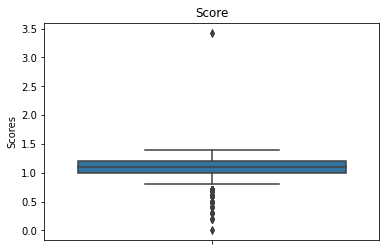

In [110]:
#Scores box plot
sns.boxplot(data=df_clean, y='score')
plt.title('Score');

plt.ylabel('Scores');

In [84]:
#remove outlier
#df_clean = df_clean[df_clean.score < 100]

With outlier remove majority of scores remain under 20. Very few high scores. 

What dog age is likely to score the highest

In [86]:
df_clean.describe()

,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,score
count,1645.00,1645.00,1645.00,1645.00,1645.00,1645.00,1645.00,1645.00
mean,11.48,10.53,0.60,0.14,0.06,2483.84,7993.12,1.09
std,7.93,6.96,0.27,0.10,0.05,4367.51,11902.46,0.19
min,0.00,7.00,0.04,0.00,0.00,11.00,0.00,0.00
25%,10.00,10.00,0.38,0.06,0.02,563.00,1745.00,1.00
50%,11.00,10.00,0.60,0.12,0.05,1237.00,3616.00,1.10
75%,12.00,10.00,0.85,0.20,0.10,2868.00,10011.00,1.20
max,165.00,150.00,1.00,0.47,0.27,72569.00,147921.00,3.43


(None       1398
 pupper      163
 doggo        55
 puppo        22
 floofer       7
 Name: age_stage, dtype: int64,
 None      0.85
 pupper    0.10
 doggo     0.03
 puppo     0.01
 floofer   0.00
 Name: age_stage, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f20610b6590>)

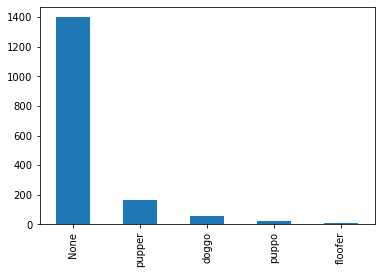

In [87]:
#plot values counts of age stages
df_clean.age_stage.value_counts(), df_clean.age_stage.value_counts(True), df_clean.age_stage.value_counts().plot(kind='bar')

In [88]:
#find column means by grouping age stage
df_clean.groupby('age_stage').mean()

,rating_numerator,rating_denominator,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count,score
age_stage,,,,,,,,,,,
None,11.52,10.62,0.60,0.87,0.14,0.88,0.06,0.86,2312.55,7608.86,1.08
doggo,11.95,10.00,0.57,0.89,0.17,0.91,0.06,0.82,6612.05,17545.18,1.19
floofer,12.00,10.00,0.61,1.00,0.16,1.00,0.05,0.86,4074.86,11459.00,1.20
pupper,10.90,10.00,0.64,0.86,0.13,0.90,0.06,0.86,2105.80,6427.98,1.09
puppo,11.95,10.00,0.72,0.86,0.14,0.95,0.04,1.00,5342.41,19024.23,1.20


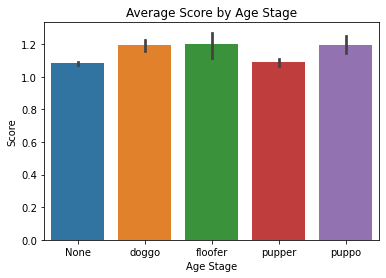

In [89]:
#plot score means by age stage
df_clean.groupby('age_stage').mean(), sns.barplot(x='age_stage', y='score', data=df_clean);
plt.title('Average Score by Age Stage');
plt.xlabel('Age Stage');
plt.ylabel('Score');

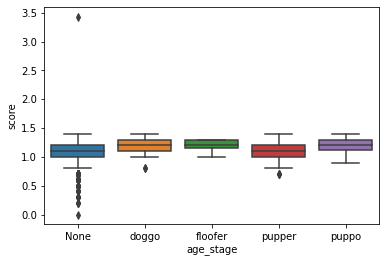

In [90]:
#plot scores by age stage
sns.boxplot(data= df_clean, x= 'age_stage', y='score')

- Dogs with missing age make up 85% of the dataset population

- there are only 7 floofers

On average

- Dogs age stage labels puppo and floofer score the highest at 1.20

- dog wit no age scores the least with 1.08

Remove dog without a age stage because we can not accurately know which dog scores higher without it.

In [91]:
#new dataset without None dog age
df_dog_age = df_clean[df_clean.age_stage != 'None']

In [92]:
df_dog_age

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,score
9,890240255349198849,nan,nan,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.00,10.00,Cassie,...,True,Cardigan,0.45,True,Chihuahua,0.03,True,6231,28543,1.40
34,884162670584377345,nan,nan,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.00,10.00,Yogi,...,True,malinois,0.20,True,Norwegian_elkhound,0.05,True,2547,18308,1.20
70,872967104147763200,nan,nan,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12.00,10.00,None,...,True,Chesapeake_Bay_retriever,0.17,True,German_short-haired_pointer,0.09,True,4659,24555,1.20
76,871515927908634625,nan,nan,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12.00,10.00,Napolean,...,True,briard,0.02,True,swab,0.00,False,3008,18246,1.20
85,869596645499047938,nan,nan,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12.00,10.00,Scout,...,True,toy_terrier,0.01,True,muzzle,0.01,False,2693,14487,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,752519690950500352,nan,nan,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11.00,10.00,None,...,False,Labrador_retriever,0.00,True,Eskimo_dog,0.00,True,3237,7020,1.10
1943,751132876104687617,nan,nan,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10.00,10.00,Cooper,...,True,Chesapeake_Bay_retriever,0.04,True,golden_retriever,0.01,True,1214,4825,1.00
1944,744995568523612160,nan,nan,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9.00,10.00,Abby,...,True,Shih-Tzu,0.15,True,Tibetan_terrier,0.13,True,576,2811,0.90
1945,743253157753532416,nan,nan,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10.00,10.00,Kilo,...,True,Siberian_husky,0.37,True,Eskimo_dog,0.18,True,1146,4021,1.00


(pupper     163
 doggo       55
 puppo       22
 floofer      7
 Name: age_stage, dtype: int64,
 pupper    0.66
 doggo     0.22
 puppo     0.09
 floofer   0.03
 Name: age_stage, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2060e96190>)

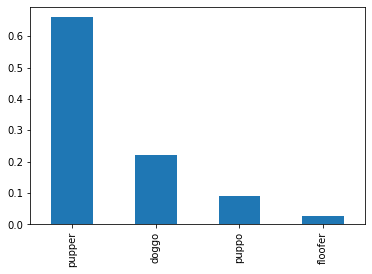

In [93]:
#plot value counts of age stage without nones
df_dog_age.age_stage.value_counts(), df_dog_age.age_stage.value_counts(True), df_dog_age.age_stage.value_counts(True).plot(kind='bar')

In [94]:
df_dog_age.score.describe()

count   247.00
mean      1.13
std       0.15
min       0.70
25%       1.00
50%       1.10
75%       1.20
max       1.40
Name: score, dtype: float64

In [112]:
#group age stage by means
df_dog_age.groupby('age_stage').mean()

,rating_numerator,rating_denominator,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count,score
age_stage,,,,,,,,,,,
doggo,11.95,10.00,0.57,0.89,0.17,0.91,0.06,0.82,6612.05,17545.18,1.19
floofer,12.00,10.00,0.61,1.00,0.16,1.00,0.05,0.86,4074.86,11459.00,1.20
pupper,10.90,10.00,0.64,0.86,0.13,0.90,0.06,0.86,2105.80,6427.98,1.09
puppo,11.95,10.00,0.72,0.86,0.14,0.95,0.04,1.00,5342.41,19024.23,1.20


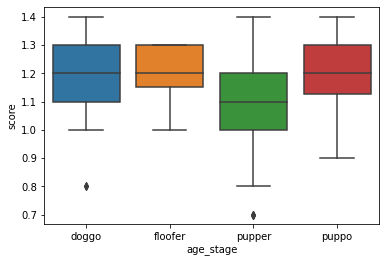

In [96]:
#plot scores by age stage
sns.boxplot(data= df_dog_age, x= 'age_stage', y='score')

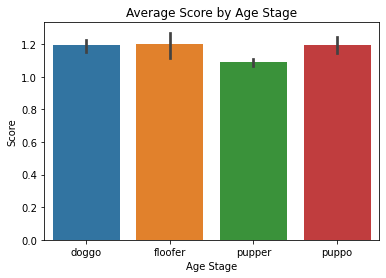

In [97]:
#plot means by age stage
sns.barplot(x='age_stage', y='score', data=df_dog_age);
plt.title('Average Score by Age Stage');
plt.xlabel('Age Stage');
plt.ylabel('Score');

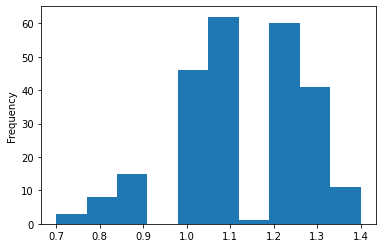

In [98]:
#plot distribution of scores
df_dog_age.score.plot(kind='hist' ,bins=10)

Exploratory Analysis

- dogs with age defined averages scores are 1.13 and 1.40 being the max score
- puppers make up 66% of the dataset 
- puppos and floofers on average score higher



Is there a biased toward dogs with name listed?

In [99]:
#create new column named with values on name for edititng
df_clean['named'] = df_clean.name

In [100]:
#change missing names to no name
df_clean.named.replace('None', 'no_name', inplace=True)

In [101]:
#change names to has_name
df_clean.loc[(df_clean.named != 'no_name'),'named']='has_name'

In [102]:
df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,score,named
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.00,10.00,Tilly,...,Pekinese,0.09,True,papillon,0.07,True,5391,29908,1.30,has_name
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.00,10.00,Archie,...,malamute,0.08,True,kelpie,0.03,True,3553,22506,1.20,has_name
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.00,10.00,Darla,...,Labrador_retriever,0.17,True,spatula,0.04,False,7398,37720,1.30,has_name
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.00,10.00,Franklin,...,English_springer,0.23,True,German_short-haired_pointer,0.18,True,7933,36015,1.20,has_name
5,891087950875897856,nan,nan,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.00,10.00,None,...,Irish_terrier,0.12,True,Indian_elephant,0.08,False,2667,18179,1.30,no_name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,752519690950500352,nan,nan,2016-07-11 15:07:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11.00,10.00,None,...,Labrador_retriever,0.00,True,Eskimo_dog,0.00,True,3237,7020,1.10,no_name
1943,751132876104687617,nan,nan,2016-07-07 19:16:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10.00,10.00,Cooper,...,Chesapeake_Bay_retriever,0.04,True,golden_retriever,0.01,True,1214,4825,1.00,has_name
1944,744995568523612160,nan,nan,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9.00,10.00,Abby,...,Shih-Tzu,0.15,True,Tibetan_terrier,0.13,True,576,2811,0.90,has_name
1945,743253157753532416,nan,nan,2016-06-16 01:25:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10.00,10.00,Kilo,...,Siberian_husky,0.37,True,Eskimo_dog,0.18,True,1146,4021,1.00,has_name


(has_name    1217
 no_name      428
 Name: named, dtype: int64,
 has_name   0.74
 no_name    0.26
 Name: named, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2061118710>)

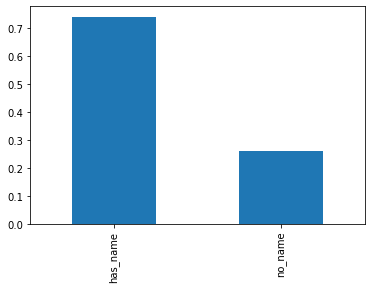

In [103]:
#plot values counts of named and no name dogs
df_clean.named.value_counts(), df_clean.named.value_counts(True), df_clean.named.value_counts(True).plot(kind='bar')

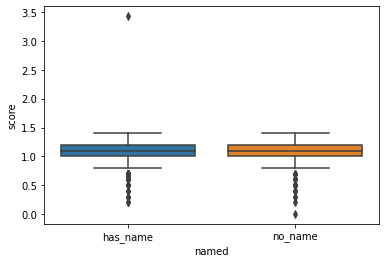

In [104]:
#plot scores of nane and no name dogs
sns.boxplot(data= df_clean, x= 'named', y='score');

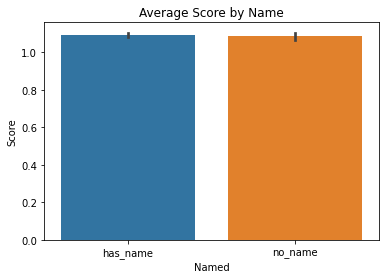

In [105]:
#plots mean scores of name and no name dogs
sns.barplot(x='named', y='score', data=df_clean);
plt.title('Average Score by Name');
plt.xlabel('Named');
plt.ylabel('Score');

In [106]:
#check the means by grouping name
df_clean.groupby('named').mean()

,rating_numerator,rating_denominator,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count,score
named,,,,,,,,,,,
has_name,10.96,10.03,0.61,0.88,0.14,0.89,0.06,0.86,2440.55,8154.19,1.09
no_name,12.97,11.94,0.59,0.86,0.14,0.88,0.06,0.87,2606.94,7535.13,1.09


In [107]:
#average score
df_clean.score.mean()

1.0910401926341136

Exploratory Anaylsis

- dog with names make up 74% of the data set

- dogs with names have the highest score and on average score the same as dogs without names

- both dogs with and without names average score is equal to the total average score. 

# Insights

- Dogs without an age label are likly to score lower.

- Amoung dogs with an age label, Puppos appear to be the favorite in terms of scoring higher

- Name or no name doesn't determine score when it comes to all dogs.

In [108]:
#check means by grouping age and name
df_clean.groupby(['age_stage', 'named']).mean()

rating_numerator  rating_denominator  p1_conf  p1_dog  \
age_stage named                                                             
None      has_name             10.93               10.04     0.60    0.88   
          no_name              13.41               12.51     0.59    0.87   
doggo     has_name             12.21               10.00     0.60    0.88   
          no_name              11.52               10.00     0.52    0.90   
floofer   has_name             11.60               10.00     0.58    1.00   
          no_name              13.00               10.00     0.67    1.00   
pupper    has_name             10.59               10.00     0.65    0.88   
          no_name              11.32               10.00     0.62    0.82   
puppo     has_name             11.81               10.00     0.72    0.88   
          no_name              12.33               10.00     0.72    0.83   

                    p2_conf  p2_dog  p3_conf  p3_dog  retweet_count  \
age_stage named                                                       
None      has_name     0.14    0.89     0.06    0.86        2386.24   
          no_name      0.14    0.87     0.06    0.86        2075.01   
doggo     has_name     0.16    0.91     0.05    0.74        5239.82   
          no_name      0.18    0.90     0.07    0.95        8833.76   
floofer   has_name     0.14    1.00     0.06    0.80        1859.40   
          no_name      0.19    1.00     0.02    1.00        9613.50   
pupper    has_name     0.12    0.89     0.05    0.85        2014.29   
          no_name      0.15    0.90     0.06    0.87        2233.65   
puppo     has_name     0.17    0.94     0.05    1.00        2825.94   
          no_name      0.07    1.00     0.03    1.00       12053.00   

                    favorite_count  score  
age_stage named                            
None      has_name         8001.53   1.09  
          no_name          6343.08   1.07  
doggo     has_name        14920.62   1.22  
          no_name         21794.48   1.15  
floofer   has_name         8368.60   1.16  
          no_name         19185.00   1.30  
pupper    has_name         7087.47   1.06  
          no_name          5506.63   1.13  
puppo     has_name        10222.44   1.18  
          no_name         42495.67   1.23

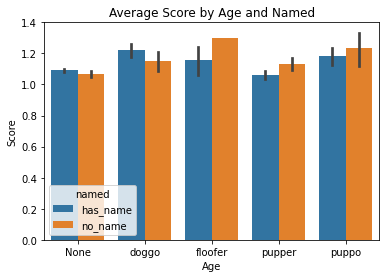

In [109]:
#plot means by age and name
sns.barplot(x='age_stage', y='score', hue='named', data=df_clean);
plt.title('Average Score by Age and Named');
plt.xlabel('Age');
plt.ylabel('Score');

-	Floofers with no names are the highest scorers. Average score 1.30 well above the average score. 
-	Doggos with a name and No age with name, will score higher then doggos and no age without a name listed. 
-	Dogs with no name or age and puppers with names score below average
-	Dogs with no personal information are average scorers
